# Project: Investigate a Dataset (TMDB movie Dataset)


## Table of Contents
<ul>
   
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb),
including user ratings and revenue.

![alt text](https://upload.wikimedia.org/wikipedia/commons/8/89/Tmdb.new.logo.svg)

> __We will to try to:__ 
>><br>Understand did runtime of movies has changed over years.
>><br>Understand Which genres are most popular ?
>><br>What kinds of properties to create good movie which can give us a profit more than 50M Dollars?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, I will load in the data, check for cleanliness, and then trim and clean our dataset for analysis. 


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv("tmdb.csv")
#   types and look for instances of missing or possibly errant data.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#find number of rows and columns in dataset
df.shape

(10866, 21)

In [4]:
# find data types for explore missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Remove some data not nedeed in our case study
df.drop(["imdb_id", "homepage", "tagline", "production_companies", "overview", "budget_adj", "revenue_adj"], axis= 1, inplace=True)

In [6]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [7]:
sum(df.duplicated())

1

In [8]:
# Remove duplicate rows 
df.drop_duplicates(keep = 'first', inplace = True)
rows, col = df.shape
sum(df.duplicated())

0

In [9]:
# Convert column release date to DateTime
df.release_date = pd.to_datetime(df['release_date'])

In [10]:
df.shape

(10865, 14)

In [11]:
# Replace 0 with NAN
columns = ['budget', 'revenue','cast','keywords']
df[columns] = df[columns].replace(0, np.NaN)
df.dropna(subset = columns, inplace = True)
rows, col = df.shape

In [12]:
# Remove movies had budget less than 1000 US
df = df[df["budget"] > 1000]  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3695 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3695 non-null   int64         
 1   popularity      3695 non-null   float64       
 2   budget          3695 non-null   float64       
 3   revenue         3695 non-null   float64       
 4   original_title  3695 non-null   object        
 5   cast            3695 non-null   object        
 6   director        3695 non-null   object        
 7   keywords        3695 non-null   object        
 8   runtime         3695 non-null   int64         
 9   genres          3695 non-null   object        
 10  release_date    3695 non-null   datetime64[ns]
 11  vote_count      3695 non-null   int64         
 12  vote_average    3695 non-null   float64       
 13  release_year    3695 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)
m

In [13]:
# Remove movies had revenue less than 1000 US
df = df[df["revenue"] > 1000]  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3683 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3683 non-null   int64         
 1   popularity      3683 non-null   float64       
 2   budget          3683 non-null   float64       
 3   revenue         3683 non-null   float64       
 4   original_title  3683 non-null   object        
 5   cast            3683 non-null   object        
 6   director        3683 non-null   object        
 7   keywords        3683 non-null   object        
 8   runtime         3683 non-null   int64         
 9   genres          3683 non-null   object        
 10  release_date    3683 non-null   datetime64[ns]
 11  vote_count      3683 non-null   int64         
 12  vote_average    3683 non-null   float64       
 13  release_year    3683 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)
m

In [14]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


In [15]:
df.dtypes

id                         int64
popularity               float64
budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
keywords                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

In [16]:
columns = ['budget', 'revenue']
df[columns] = df[columns].applymap(np.int64)

df.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
keywords                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

#### I have now finished our Data Wrangling section

#### General look in dataset

> **Tip**: In this section of the report, we will take a general look for our dataset and calculating the five number summary for each column.

In [17]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3683.000000,3683.000000,3.683000e+03,3.683000e+03,3683.000000,3683.000000,3683.000000,3683.000000
mean,39188.473255,1.222345,3.802263e+07,1.113031e+08,109.531903,546.142818,6.184849,2001.131958
std,67128.628381,1.499141,4.264043e+07,1.792442e+08,19.905310,894.721312,0.790003,11.360756
min,5.000000,0.001117,7.000000e+03,2.521000e+03,26.000000,10.000000,2.200000,1960.000000
25%,5550.500000,0.476580,1.000000e+07,1.489688e+07,96.000000,76.000000,5.700000,1995.000000
50%,11058.000000,0.826568,2.500000e+07,4.795198e+07,106.000000,216.000000,6.200000,2004.000000
75%,37940.500000,1.409379,5.000000e+07,1.294677e+08,119.000000,592.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


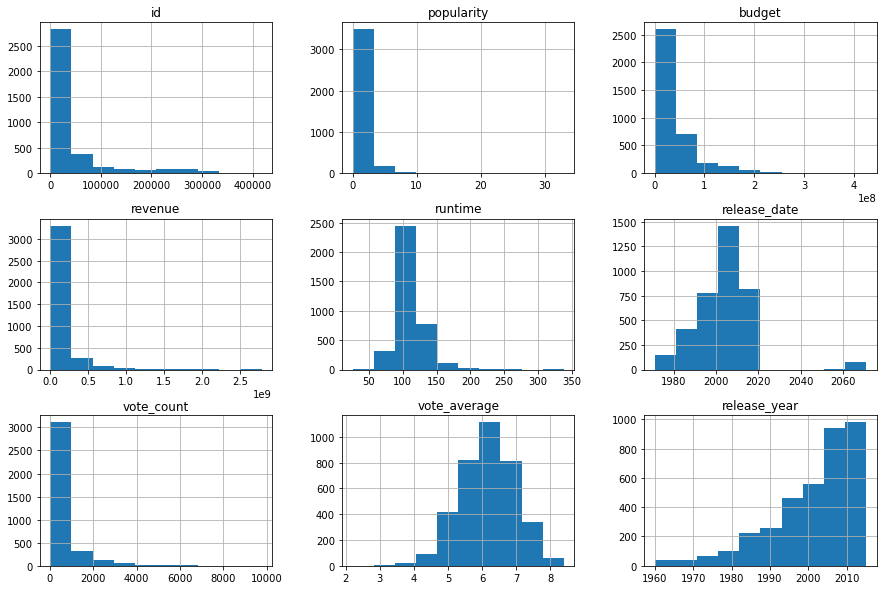

In [18]:
#histogram for all dataset
df.hist(figsize=(15, 10));

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that i've trimmed and cleaned our data, I're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Q1.1: Which movie had the longest running time and which movie had the shortest running time?

In [19]:
df.loc[df['runtime'].idxmax()]

id                                                            43434
popularity                                                 0.534192
budget                                                     18000000
revenue                                                      871279
original_title                                               Carlos
cast              Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
director                                            Olivier Assayas
keywords                 gun|car bomb|tv mini-series|terrorism|opec
runtime                                                         338
genres                                 Crime|Drama|Thriller|History
release_date                                    2010-05-19 00:00:00
vote_count                                                       35
vote_average                                                    6.2
release_year                                                   2010
Name: 2107, dtype: object

In [20]:
df.loc[df['runtime'].idxmin()]

id                                                            14813
popularity                                                 0.592219
budget                                                      3000000
revenue                                                    21000000
original_title                             Mickey's Christmas Carol
cast              Alan Young|Wayne Allwine|Clarence Nash|Hal Smi...
director                                            Burny Mattinson
keywords            cartoon|scrooge|ghost|charles dickens|christmas
runtime                                                          26
genres                                             Family|Animation
release_date                                    1983-10-19 00:00:00
vote_count                                                       89
vote_average                                                    7.4
release_year                                                   1983
Name: 8005, dtype: object

> Which movie had the longest running time and which movie had the shortest running time?

> Longest running time movie is  **_Carlos_** with runtime of 338 min, And Shortest running time movie is  **_Mickey's Christmas Carol_** with runtime of 26 min.

### Research Q1.2: What's average runtime for all movies?

In [21]:
df['runtime'].mean()

109.53190333966874

> Average runtime of the movies is 109 minutes.

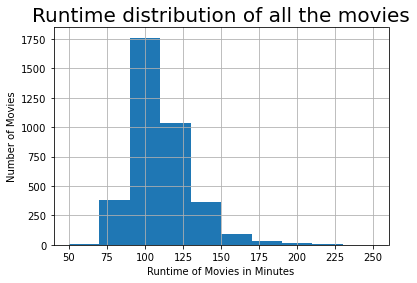

In [22]:
plt.title('Runtime distribution of all the movies', fontsize = 20)
plt.xlabel('Runtime of Movies in Minutes', fontsize = 10)
plt.ylabel('Number of Movies', fontsize = 10)
plt.hist(df['runtime'],range=(50,250), bins = 10);
plt.grid()

### The histogram shows that most movies have around one hour and half to two hours.

### Research Q1.3:Did the runtime for movies changes over years?

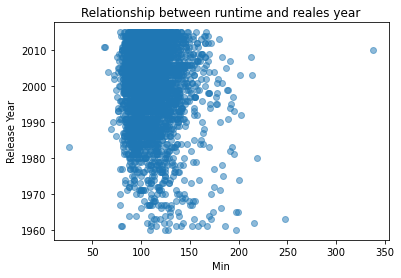

In [63]:
plt.xlabel('Min')
plt.ylabel('Release Year')
plt.title('Relationship between runtime and reales year')
plt.scatter(df['runtime'], df['release_year'], alpha=.5)
plt.show()

#### As the graph showa above the runtime of movies has not changed to much over years.

### Research Q2.1: What are the highest-rated films for audiences based on popularity ?

In [64]:
# make new df ignore vote_count less than 100 vote
df_new = df[df['vote_count'] >= 100]
df_new.index = range(len(df_new))
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              2555 non-null   int64         
 1   popularity      2555 non-null   float64       
 2   budget          2555 non-null   int64         
 3   revenue         2555 non-null   int64         
 4   original_title  2555 non-null   object        
 5   cast            2555 non-null   object        
 6   director        2555 non-null   object        
 7   keywords        2555 non-null   object        
 8   runtime         2555 non-null   int64         
 9   genres          2555 non-null   object        
 10  release_date    2555 non-null   datetime64[ns]
 11  vote_count      2555 non-null   int64         
 12  vote_average    2555 non-null   float64       
 13  release_year    2555 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
me

In [65]:
df_new.loc[df_new['popularity'].idxmax()]

id                                                           135397
popularity                                                32.985763
budget                                                    150000000
revenue                                                  1513528810
original_title                                       Jurassic World
cast              Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director                                            Colin Trevorrow
keywords          monster|dna|tyrannosaurus rex|velociraptor|island
runtime                                                         124
genres                    Action|Adventure|Science Fiction|Thriller
release_date                                    2015-06-09 00:00:00
vote_count                                                     5562
vote_average                                                    6.5
release_year                                                   2015
Name: 0, dtype: object

In [66]:
df_new.loc[df_new['popularity'].idxmin()]

id                                                           116741
popularity                                                 0.040858
budget                                                     58000000
revenue                                                    44000000
original_title                                       The Internship
cast              Owen Wilson|Vince Vaughn|Tiya Sircar|Rose Byrn...
director                                                 Shawn Levy
keywords          job interview|loss of job|intern|reference to ...
runtime                                                         119
genres                                                       Comedy
release_date                                    2013-06-07 00:00:00
vote_count                                                     1174
vote_average                                                    6.1
release_year                                                   2013
Name: 1477, dtype: object

> Which movie had the most and less popularity?

> The most popularity movie is  **_Jurassic World_** with popularity of 32.985763, And The less popularity movie is  **_The Internship_** with popularity of  0.040858.

### Research Q2.2: What are the highest-rated films for audiences based on voting average ?

In [67]:
df_new.loc[df_new['vote_average'].idxmax()]

id                                                              278
popularity                                                 7.192039
budget                                                     25000000
revenue                                                    28341469
original_title                             The Shawshank Redemption
cast              Tim Robbins|Morgan Freeman|Bob Gunton|William ...
director                                             Frank Darabont
keywords          prison|corruption|police brutality|prison cell...
runtime                                                         142
genres                                                  Drama|Crime
release_date                                    1994-09-10 00:00:00
vote_count                                                     5754
vote_average                                                    8.4
release_year                                                   1994
Name: 1037, dtype: object

In [68]:
df_new.loc[df_new['vote_average'].idxmin()]

id                                                            13805
popularity                                                 0.812489
budget                                                     25000000
revenue                                                    14109284
original_title                                       Disaster Movie
cast              Matt Lanter|Vanessa Lachey|Nicole Ari Parker|C...
director                              Jason Friedberg|Aaron Seltzer
keywords          natural disaster|violence|mortal danger|during...
runtime                                                          87
genres                                                Action|Comedy
release_date                                    2008-08-29 00:00:00
vote_count                                                      130
vote_average                                                    3.3
release_year                                                   2008
Name: 803, dtype: object

Which movie had the highest and lowest average voting?

> The highest rating movie is  **_The Shawshank Redemption_** with rating **8.4**, And The lowest rating movie is  **_Disaster Movie_** with rating **3.3**.

### Research Q2.3: What's the highest ten rated films for audiences based on voting average ?

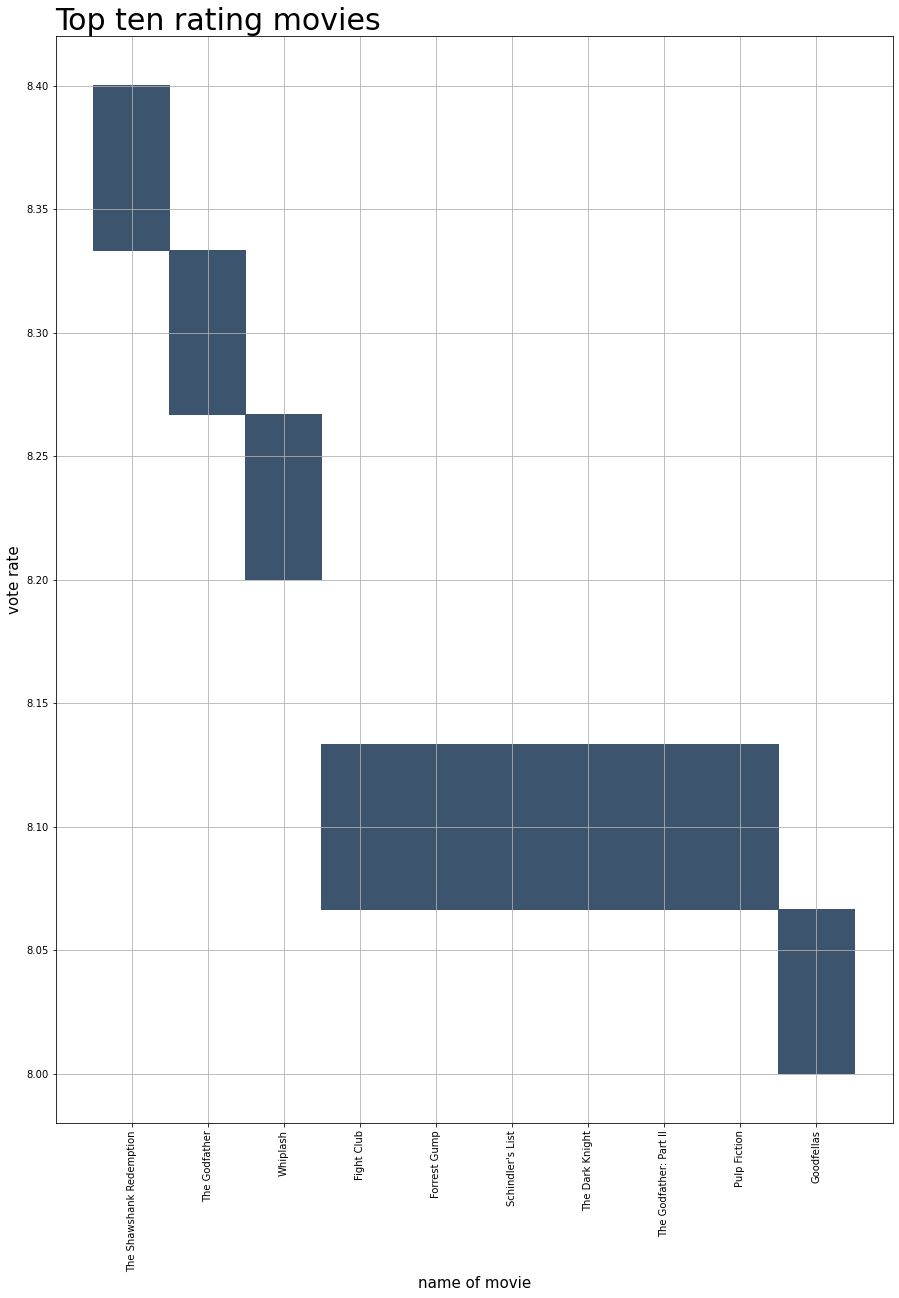

In [69]:
plt.figure(figsize=(15,20));
tp = df_new[["original_title", "vote_average"]].sort_values("vote_average", ascending = False).head(10)
sns.histplot( x='original_title',y='vote_average', data=tp)
plt.title('Top ten rating movies', fontsize = 30, loc="left")
plt.xlabel('name of movie', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('vote rate', fontsize = 15)
plt.grid()
plt.show()

## We calculating now the profit for each movie.

###  Which movie had the highest and lowest profit?and find out top ten movies most profitable?

In [70]:
df['profit'] = df['revenue'] - df['budget']

df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1316249360


### Q3.1: Which movie had the highest and lowest profit?

In [72]:
df.loc[df['profit'].idxmax()]

id                                                            19995
popularity                                                 9.432768
budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                              James Cameron
keywords          culture clash|future|space war|space colony|so...
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
vote_count                                                     8458
vote_average                                                    7.1
release_year                                                   2009
profit                                          

In [73]:
df.loc[df['profit'].idxmin()]

id                                                            46528
popularity                                                  0.25054
budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
keywords          assassin|small town|revenge|deception|super speed
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
vote_count                                                       74
vote_average                                                    6.4
release_year                                                   2010
profit                                          

Which movie had the highest and lowest profit?

> Highest revenue is  **_Avatar_** with profit of 2,544,505,847 US dollars, And lowest revenue is  **_The Warrior's Way_** with loss of 413,912,431 US dollars.

## Q3.2 Top ten profitable movies debend as our dataset.

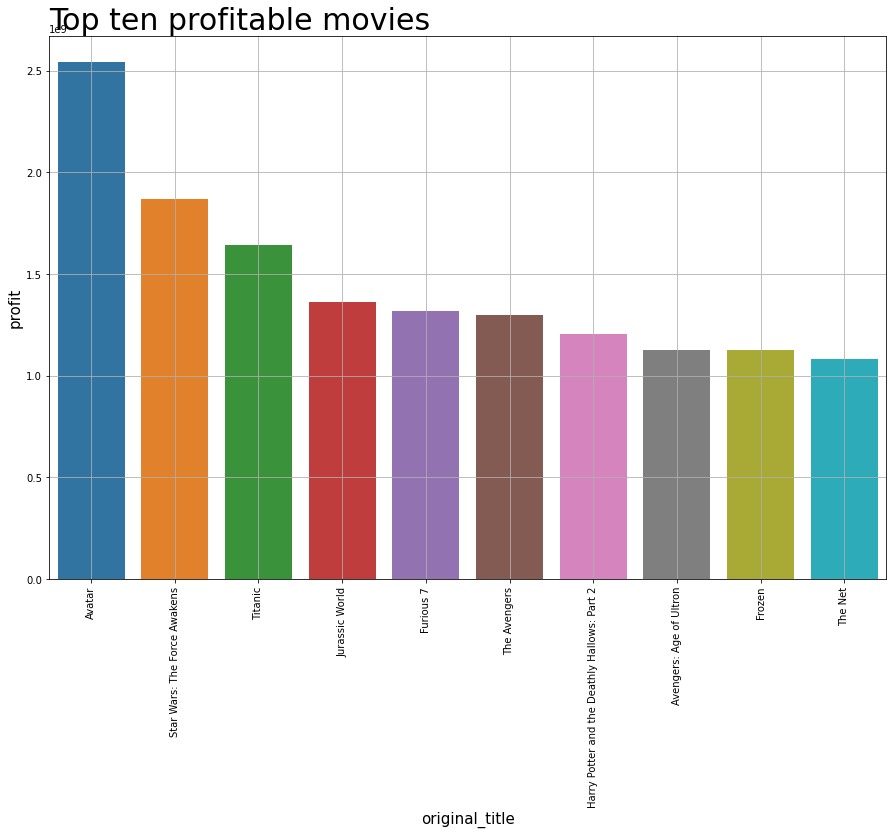

In [74]:
plt.figure(figsize=(15,10));
tp = df[["original_title", "profit"]].sort_values("profit", ascending = False).head(10)
sns.barplot(x='original_title',y='profit', data=tp)
plt.title('Top ten profitable movies', fontsize = 30, loc="left")
plt.xlabel('original_title', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('profit', fontsize = 15)
plt.grid()
plt.show()

### Q3.3: Which movie had the highest and lowest revenue?

In [75]:
df.loc[df['revenue'].idxmax()]

id                                                            19995
popularity                                                 9.432768
budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                              James Cameron
keywords          culture clash|future|space war|space colony|so...
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
vote_count                                                     8458
vote_average                                                    7.1
release_year                                                   2009
profit                                          

In [76]:
df.loc[df['revenue'].idxmin()]

id                                                            98339
popularity                                                 0.402086
budget                                                     12000000
revenue                                                        2521
original_title                                        The Samaritan
cast              Samuel L. Jackson|Luke Kirby|Ruth Negga|Tom Wi...
director                                               David Weaver
keywords                          prison|sex|revenge|incest|grifter
runtime                                                          90
genres                                                     Thriller
release_date                                    2012-03-02 00:00:00
vote_count                                                       27
vote_average                                                    4.7
release_year                                                   2012
profit                                          

Which movie had the highest and lowest revenue?

> Highest revenue is  **_Avatar_** with revenue of 2,781,505,847 US dollars, And lowest revenue is  **_The Samaritan_** with revenue of 2521 US dollars.

### Q3:4 Which movie had the highest and lowest budget?

In [77]:
df.loc[df['budget'].idxmax()]

id                                                            46528
popularity                                                  0.25054
budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
keywords          assassin|small town|revenge|deception|super speed
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
vote_count                                                       74
vote_average                                                    6.4
release_year                                                   2010
profit                                          

In [78]:
df.loc[df['budget'].idxmin()]

id                                                            14337
popularity                                                 0.856329
budget                                                         7000
revenue                                                      424760
original_title                                               Primer
cast              Shane Carruth|David Sullivan|Casey Gooden|Anan...
director                                              Shane Carruth
keywords          distrust|garage|identity crisis|time travel|ti...
runtime                                                          79
genres                               Science Fiction|Drama|Thriller
release_date                                    2004-10-08 00:00:00
vote_count                                                      341
vote_average                                                    6.9
release_year                                                   2004
profit                                          

>Which movie had the highest and lowest revenue?

>Highest revenue is **_The Warrior's Way_** with budget of 42,5000,000 US dollars, And lowest budget is **_Primer_** with revenue of 7000 US dollars.

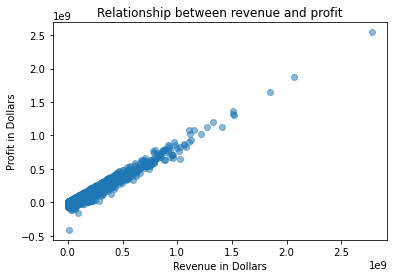

In [79]:
plt.xlabel('Revenue in Dollars')
plt.ylabel('Profit in Dollars')
plt.title('Relationship between revenue and profit')
plt.scatter(df['revenue'], df['profit'], alpha=0.5)
plt.show()

> We can see that there is a strong relationship between profit and revenue.

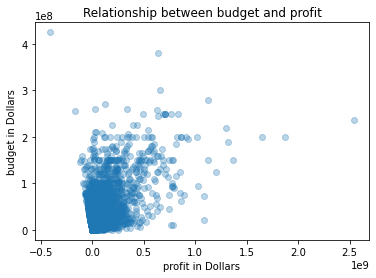

In [80]:
plt.xlabel('profit in Dollars')
plt.ylabel('budget in Dollars')
plt.title('Relationship between budget and profit')
plt.scatter(df['profit'], df['budget'], alpha=.3)
plt.show()

> We can see that the most of movies have profit around 25m dollars to 50m dollars.

 ## Q4.1:What is the average budget of the movies making  Profit more then 50M Dollars?

> Now for all the remaining questions we are going to answer them depend on profit, I will now clean our datset and only i'll leave data of movies who making profit more then 50M Dollars.

In [81]:
#New DF for movies make profit more than 50m
df_profit_50 = df[df['profit'] >= 50000000]
df_profit_50.index = range(len(df_profit_50))
df_profit_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              1318 non-null   int64         
 1   popularity      1318 non-null   float64       
 2   budget          1318 non-null   int64         
 3   revenue         1318 non-null   int64         
 4   original_title  1318 non-null   object        
 5   cast            1318 non-null   object        
 6   director        1318 non-null   object        
 7   keywords        1318 non-null   object        
 8   runtime         1318 non-null   int64         
 9   genres          1318 non-null   object        
 10  release_date    1318 non-null   datetime64[ns]
 11  vote_count      1318 non-null   int64         
 12  vote_average    1318 non-null   float64       
 13  release_year    1318 non-null   int64         
 14  profit          1318 non-null   int64         
dtypes: d

> We now have 1318 movie which has profit more than 50M Dollars

 ### Q4.2:What is the most successful genres of movies making Profit more than 50M Dollars?

In [82]:
genres_count = pd.Series(df_profit_50['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_count

Comedy             484
Drama              475
Action             458
Thriller           397
Adventure          372
Family             226
Romance            212
Science Fiction    205
Fantasy            197
Crime              190
Animation          121
Horror             119
Mystery            111
War                 46
Music               45
History             39
Western             14
Documentary          4
Foreign              1
dtype: int64

> The top 5 geners of movies making Profit more than 50M Dollars
>> ( **Comedy**, **Drama**, **Action**, **Thriller** and **Adventure** ) And you will found below pie chart showes percentage for top 5 geners.

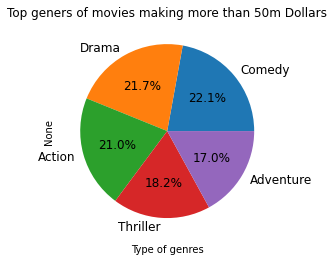

In [83]:
piechart = genres_count[0:5].plot.pie(fontsize = 12,  autopct='%1.1f%%')
plt.title('Top geners of movies making more than 50m Dollars')
piechart.set_xlabel('Type of genres')
plt.show()

 ### Q4.3:What is the most successful Star of movies making Profit more then 50M Dollars?

In [84]:
cast_count = pd.Series(df_profit_50['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
cast_count.head(10)

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
Denzel Washington     19
Jim Carrey            19
Robert De Niro        19
Bruce Willis          19
Ben Stiller           18
dtype: int64

The top 5 stars of movies making Profit more than 50M Dollars
> ( **Tom Cruise**, **Brad Pitt**, **Tom Hanks**, **Sylvester Stallone** and **Cameron Diaz** ) Lets visualize this with a plot.

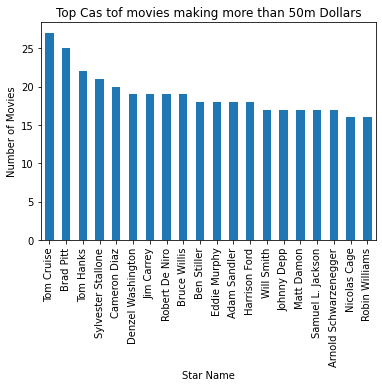

In [85]:
diagram = cast_count.head(20).plot.bar(fontsize = 10)
diagram.set(title = 'Top Cas tof movies making more than 50m Dollars')
diagram.set_xlabel('Star Name')
diagram.set_ylabel('Number of Movies')
plt.show()

#### We can clearly see in the visualization that most movies have Tom Cruise as a cast which tends to higher profit.

 ### Q4.4:What is the most successful Director of movies making Profit more then 50M Dollars?

In [622]:
director_count = pd.Series(df_profit_50['director']).value_counts(ascending = False)
director_count.head(5)

Steven Spielberg    23
Robert Zemeckis     12
Clint Eastwood      11
Tony Scott          10
Ron Howard          10
Name: director, dtype: int64

The top 5 directors of movies making Profit more than 50M Dollars
> ( **Steven Spielberg**, **Robert Zemeckis**, **Clint Eastwood**, **Tony Scott** and **Ron Howard** ) Lets visualize this with a plot.

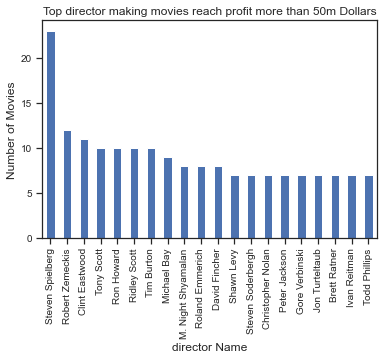

In [623]:
diagram = director_count.head(20).plot.bar(fontsize = 10)
diagram.set(title = 'Top director making movies reach profit more than 50m Dollars')
diagram.set_xlabel('director Name')
diagram.set_ylabel('Number of Movies')
plt.show()

Also we can clearly see in the visualization that most movies have Steven Spielberg as a director which tends to higher profit.

 ### Q4.5:What is the average of budget, revenue, and runtime for movies making Profit more then 50M Dollars?

In [624]:
print('The runtime average for movies making Profit more then 50M Dollars is {} min .'.format(df_profit_50['runtime'].mean()))

The runtime average for movies making Profit more then 50M Dollars is 113.74886191198786 min .


In [625]:
print('The budget average for movies making Profit more then 50M Dollars is {} .'.format(df_profit_50['budget'].mean()))

The budget average for movies making Profit more then 50M Dollars is 60638507.868740514 .


In [626]:
print('The revenue average for movies making Profit more then 50M Dollars is {} .'.format(df_profit_50['revenue'].mean()))

The revenue average for movies making Profit more then 50M Dollars is 256326340.5591806 .


> I have now finished Exploratory Data Analysis section, and all questions was answered as well.

#### Now we will see our conclusions.

<a id='conclusions'></a>
## Conclusions

> So the conclusion is, that if we want to create good movies which can give us a profit of more than 50M Dollars then<br>
<br>The average budget of the movies can be arround 60,638,507 Dollars<br>
<br>The average runtime of the movies can be arround 113.74 Minutes.<br>
<br>The Top 5 Genres we should focus on should be  Comedy, Drama, Action, Thriller, Adventure.<br>
<br>The Top 5 cast we should focus on should be Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone and Cameron Diaz.<br>
<br>The Top 5 director we should focus on should be Steven Spielberg, Robert Zemeckis, Clint Eastwood, Tony Scott and Ron Howard.<br>
<br>The average revenue of the movies will be arround 256326340.55 Dollars.

> <br>Also we now know the runtime not changed to much through years.


## The limitations associated with the conclusions are:¶
>The conclusion is not full proof that given the above requirement the movie will be a big hit but it can be.<br>
Also, we also lost some of the data in the data cleaning steps where we dont know the revenue and budget of the movie, which has affected our analysis.<br>
This conclusion is not error proof.